In [145]:
import numpy
import matplotlib.pyplot as plt
import pandas

In [139]:
def hamilton(p,h):
    q = p/sum(p) * h    # Calculate utopian seats
    res_temp = numpy.floor(q)    # Calculate initial solution
    d = q-res_temp    # Calculate remainder
    dsort = numpy.argsort(d)
    numberOfIncreses = int(h-numpy.sum(res_temp))
    for i in range(0,numberOfIncreses):
        res_temp[dsort[-(i+1)]] = res_temp[dsort[-(i+1)]] +1
    y_star = res_temp
    alpha_star = numpy.max(y_star-q)
    return [y_star, alpha_star]

# Parameters for the optimization problem

In [140]:
p_test = numpy.array([0.1,0.5,.15,0.2,0.05])
seat_min = 19900
seat_max = 20000

# _Solve_ Optimization problem for the previously defined parameters (by applying the hamilton method)

In [141]:
seats = numpy.array(range(seat_min,seat_max))
y = numpy.zeros((len(seats), len(p_test)))
alpha = numpy.zeros(len(seats))
i=0
for h_test in seats:
    y[i,:], alpha[i] = hamilton(p_test,h_test)
    i = i+1

# Display results

Plotting the optimal value over the seat number parameter reveals a (non-linear and non-decreasing) pattern

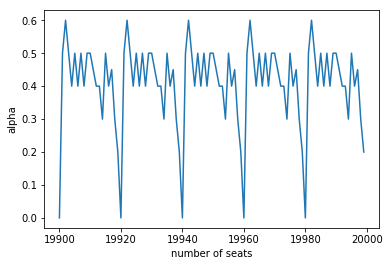

In [142]:
plt.plot(seats,alpha)
plt.ylabel('alpha')
plt.xlabel('number of seats')
plt.show()

In [143]:
exact_seats = numpy.outer(seats,p_test)
exact_table = pandas.DataFrame(exact_seats,seats)
opt_table = pandas.DataFrame(y,seats)
alpha = pandas.DataFrame(alpha,seats)
result_table = pandas.concat([opt_table,exact_table,alpha],axis=1)
result_table.columns = ['y_1','y_2','y_3','y_4','y_5','q_1','q_2','q_3','q_4','q_5','alpha']

In [144]:
result_table

,y_1,y_2,y_3,y_4,y_5,q_1,q_2,q_3,q_4,q_5,alpha
19900,1990.0,9950.0,2985.0,3980.0,995.0,1990.0,9950.0,2985.00,3980.0,995.00,0.00
19901,1990.0,9951.0,2985.0,3980.0,995.0,1990.1,9950.5,2985.15,3980.2,995.05,0.50
19902,1990.0,9951.0,2985.0,3981.0,995.0,1990.2,9951.0,2985.30,3980.4,995.10,0.60
19903,1990.0,9952.0,2985.0,3981.0,995.0,1990.3,9951.5,2985.45,3980.6,995.15,0.50
19904,1990.0,9952.0,2986.0,3981.0,995.0,1990.4,9952.0,2985.60,3980.8,995.20,0.40
19905,1990.0,9953.0,2986.0,3981.0,995.0,1990.5,9952.5,2985.75,3981.0,995.25,0.50
19906,1991.0,9953.0,2986.0,3981.0,995.0,1990.6,9953.0,2985.90,3981.2,995.30,0.40
19907,1991.0,9954.0,2986.0,3981.0,995.0,1990.7,9953.5,2986.05,3981.4,995.35,0.50
19908,1991.0,9954.0,2986.0,3982.0,995.0,1990.8,9954.0,2986.20,3981.6,995.40,0.40
19909,1991.0,9955.0,2986.0,3982.0,995.0,1990.9,9954.5,2986.35,3981.8,995.45,0.50


# Huntington method

In [ ]:
def huntington(p,h):
    a = numpy.ones(len(p))
    while numpy.sum(a) < h:
        a[numpy.argmax(p/a)] = a[numpy.argmax(p/a)] +1;
        print("Adding to index: " + str(numpy.argmax(p/a)))
        print("Current distribution: " + str(a))
        print("Polulation :" + str(p))
        print( str(numpy.sum(a)) + " Seats used from " + str(h))
    return a
pTest = [27744, 25178,19947,14614,9225,3292]
hTest = 36
aRes = huntington(pTest,hTest)
print(aRes)
print(numpy.sum(aRes))
